In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
appClean = pd.read_csv("updated_appData.csv")  # Reading the updated dataset in the csv

In [3]:
#Dropping Columns not necessary for analysis
appClean.drop(columns=['Last Updated Formatted'], inplace=True)

In [4]:
appClean.head()

,App,Category,Rating,Reviews,KB,Installs,Paid or Free,Price,Minimum Age Requirement
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,0,0.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,0,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000.0,5000000.0,0,0.0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,0,0.0,13
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000.0,100000.0,0,0.0,0


In [5]:
#Category Counts
appClean['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

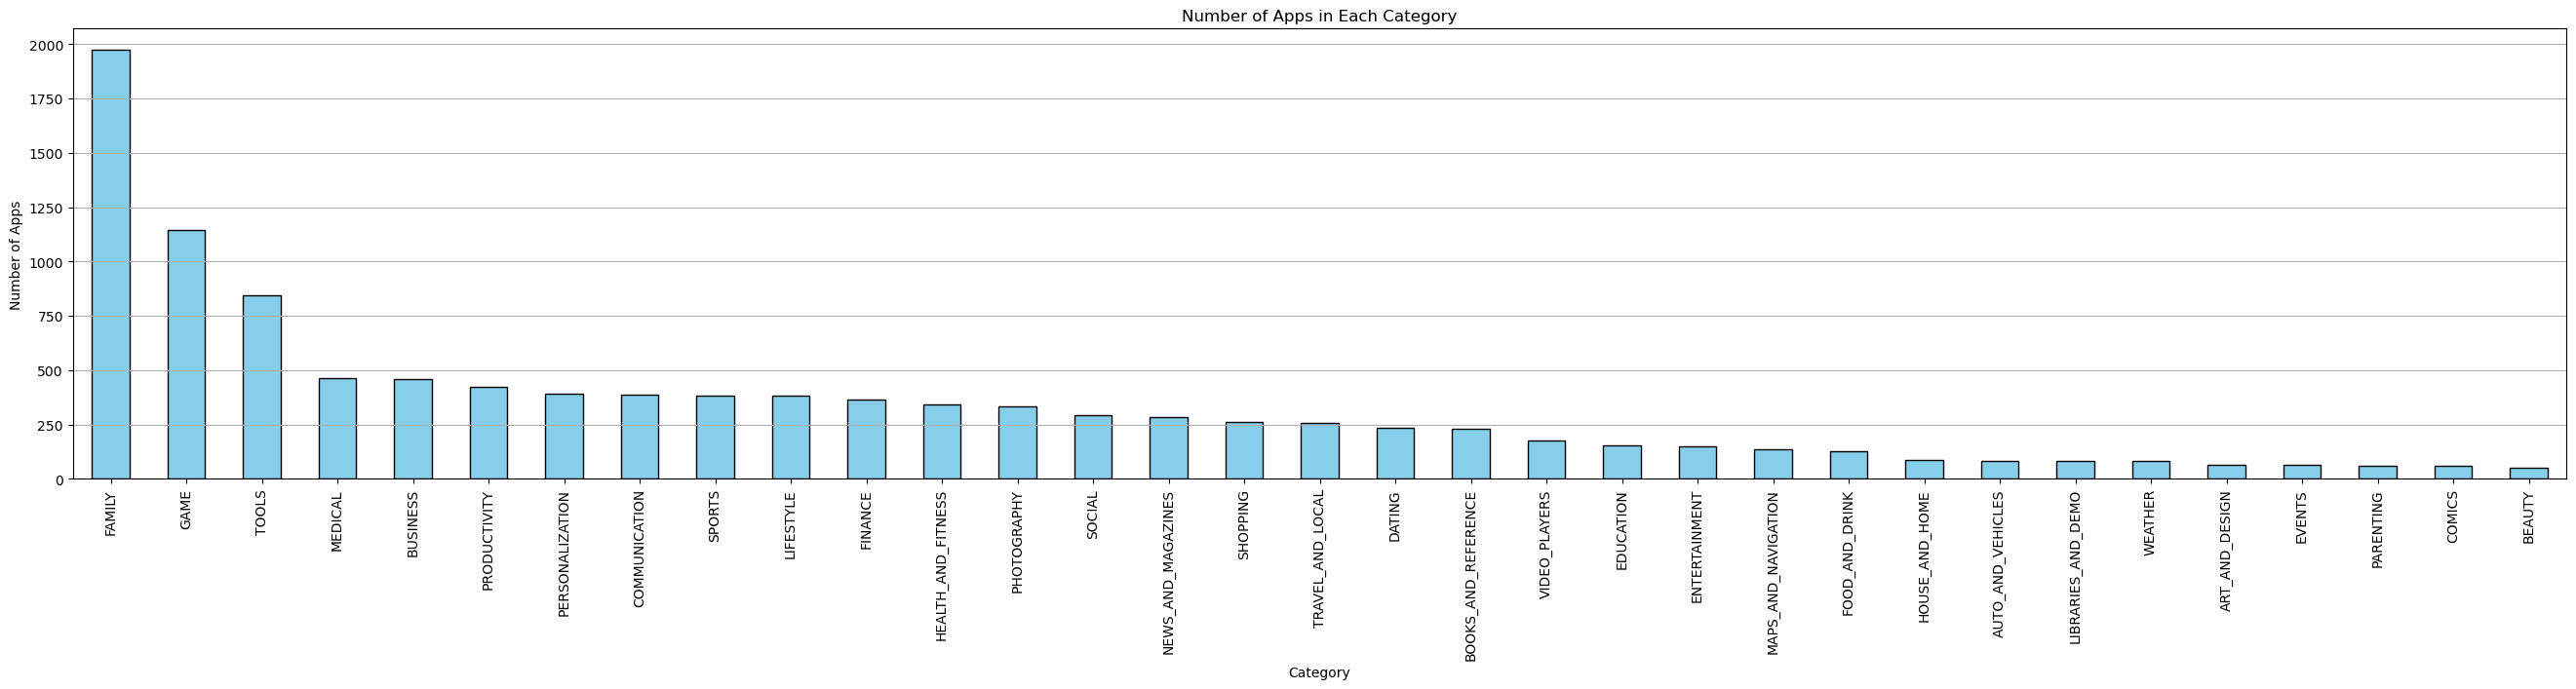

In [6]:
#Allows us to passthrough the previous calculation to the Bar Chart
category_counts = appClean['Category'].value_counts()

#Bar chart - Category Counts Visualized
plt.figure(figsize=(33, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.grid(axis='y')

In [7]:
mean_ratings = appClean.groupby('Category')['Rating'].mean()

appClean.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.350462
AUTO_AND_VEHICLES      4.190824
BEAUTY                 4.260882
BOOKS_AND_REFERENCE    4.311026
BUSINESS               4.145987
COMICS                 4.156445
COMMUNICATION          4.163842
DATING                 4.007864
EDUCATION              4.387778
ENTERTAINMENT          4.126174
EVENTS                 4.363647
FAMILY                 4.192394
FINANCE                4.139108
FOOD_AND_DRINK         4.170709
GAME                   4.282506
HEALTH_AND_FITNESS     4.266296
HOUSE_AND_HOME         4.196819
LIBRARIES_AND_DEMO     4.181962
LIFESTYLE              4.112427
MAPS_AND_NAVIGATION    4.065061
MEDICAL                4.190167
NEWS_AND_MAGAZINES     4.142993
PARENTING              4.282223
PERSONALIZATION        4.307603
PHOTOGRAPHY            4.192179
PRODUCTIVITY           4.208287
SHOPPING               4.254052
SOCIAL                 4.248001
SPORTS                 4.218404
TOOLS                  4.066280
TRAVEL_AND_LOCAL       4.119716

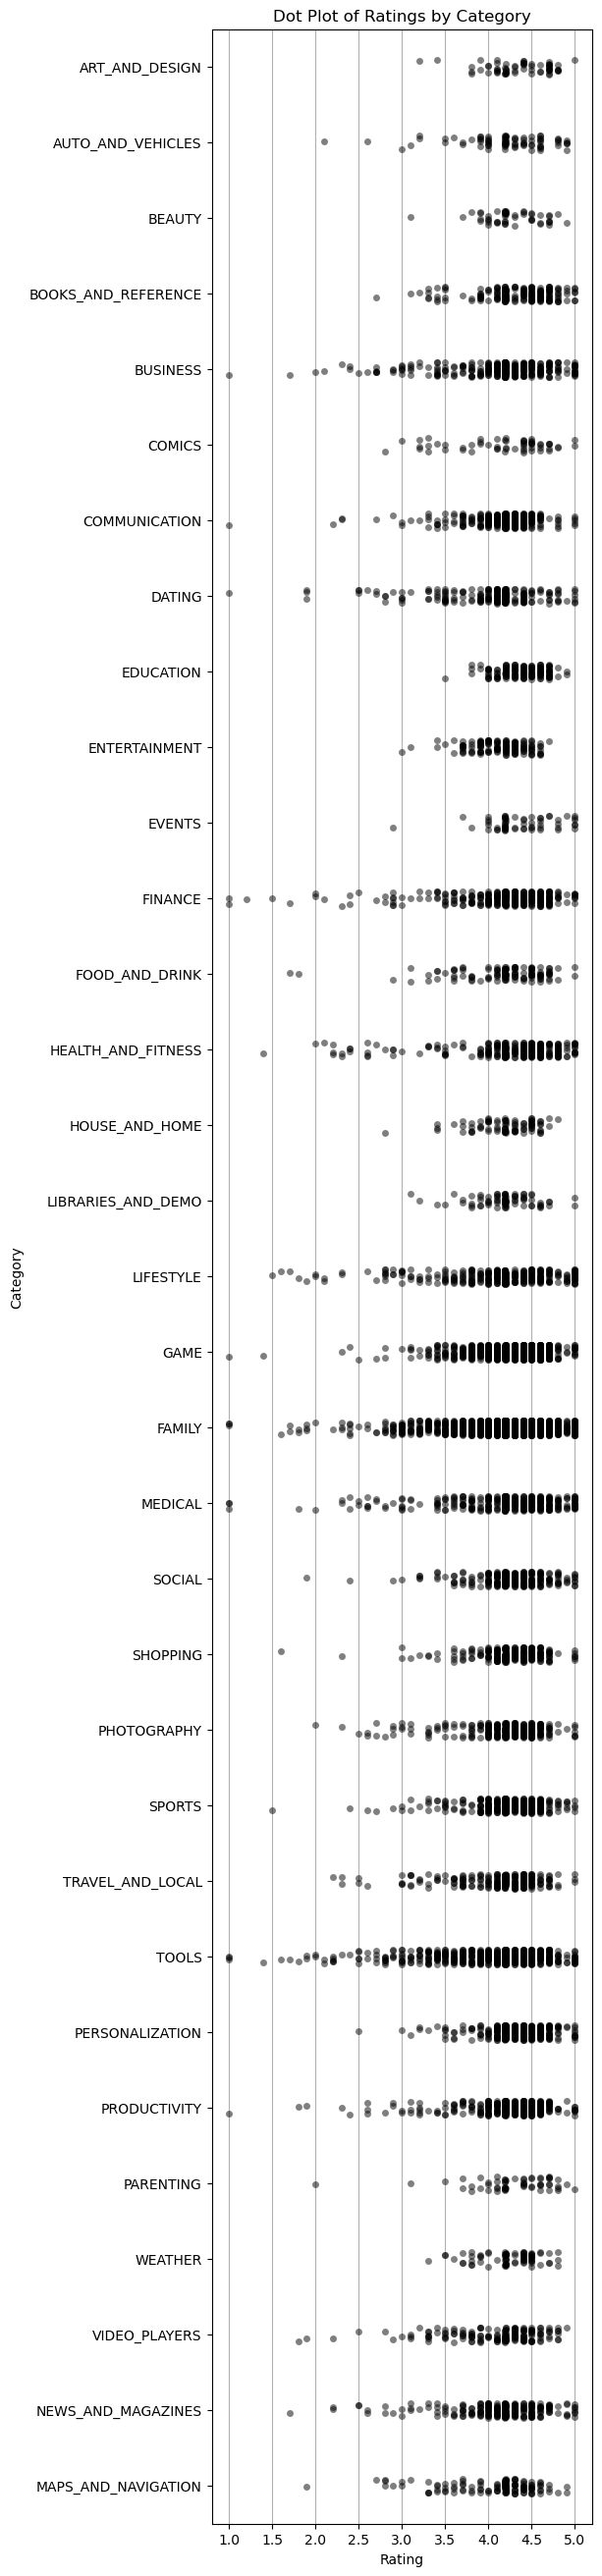

In [26]:
#Dot Plot - Reviews by Category Visualized
plt.figure(figsize=(5, 33))
sns.stripplot(x='Rating', y='Category', data=appClean, color='black', alpha=0.5, jitter=True)
plt.title('Dot Plot of Ratings by Category')
plt.ylabel('Category')
plt.xlabel('Rating')
plt.grid(axis='x')
plt.savefig("dotPlot_Categories.png", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
# Summing installs by category
total_installs_by_category = appClean.groupby('Category')['Installs'].sum().reset_index()

# Calculate installs per 1000 downloads
total_installs_by_category['Installs per 1000000'] = total_installs_by_category['Installs'] / 1000000

# Rename the columns for clarity
total_installs_by_category['Installs per 1000000'] = total_installs_by_category['Installs per 1000000'].round(1)

total_installs_1M = total_installs_by_category[['Category', 'Installs per 1000000']]

print(total_installs_1M)

               Category  Installs per 1000000
0        ART_AND_DESIGN                 124.3
1     AUTO_AND_VEHICLES                  53.1
2                BEAUTY                  27.2
3   BOOKS_AND_REFERENCE                1921.5
4              BUSINESS                1001.9
5                COMICS                  56.1
6         COMMUNICATION               32647.3
7                DATING                 264.3
8             EDUCATION                 871.5
9         ENTERTAINMENT                2869.2
10               EVENTS                  16.0
11               FAMILY               10258.3
12              FINANCE                 876.6
13       FOOD_AND_DRINK                 273.9
14                 GAME               35086.0
15   HEALTH_AND_FITNESS                1583.1
16       HOUSE_AND_HOME                 168.7
17   LIBRARIES_AND_DEMO                  63.0
18            LIFESTYLE                 537.6
19  MAPS_AND_NAVIGATION                 724.3
20              MEDICAL           

<Figure size 3300x600 with 0 Axes>

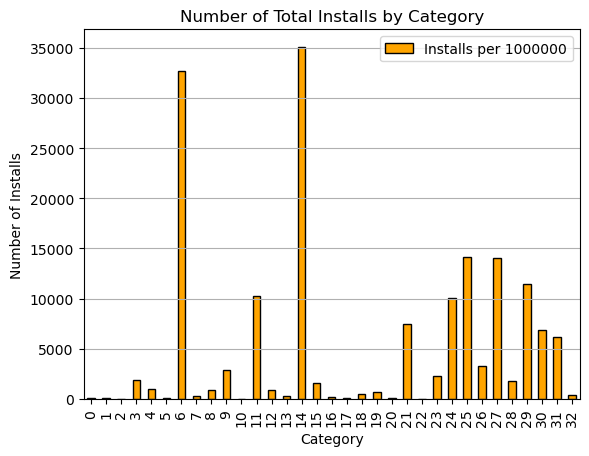

In [34]:
#Bar chart - Installs by Category Visualized
plt.figure(figsize=(33, 6))
total_installs_1M.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Number of Installs')
plt.xticks(rotation=90)
plt.grid(axis='y')